In [10]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Kullback–Leibler divergence
<br/>
\begin{equation}
\text{For discrete probability distributions P and Q }: \\
D_{KL} (P \left |  \right | Q) = \sum{P(x)} \log\left( \frac{P(x)}{Q(x)} \right )
\end{equation}

<br/>
\begin{equation}
\text{For distributions P and Q of a continuous random variable} \\
D_{KL} (P \left |  \right | Q) =  \int_{a}^{b} {p(x)}  \left(\frac{p(x)}{q(x)} \right ) dx
\end{equation}
<br/>

\begin{equation}
\mathrm{kl\_div}(x, y) =
      \begin{cases}
        x \log(x / y) - x + y & x > 0, y > 0 \\
        y & x = 0, y \ge 0 \\
        \infty & \text{otherwise}
      \end{cases}
\end{equation}

In [11]:
# dataset_1 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)
# dataset_2 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)

dataset_1 = stats.norm.rvs(size=100, loc=0, scale=1)
dataset_2 = stats.norm.rvs(size=100, loc=0, scale=1)


<AxesSubplot:ylabel='Count'>

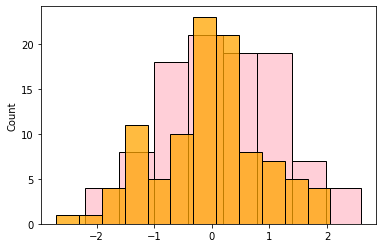

In [27]:
sns.histplot(dataset_1,color='pink')
sns.histplot(dataset_2, color='orange')


In [13]:
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [22]:
# Calculate data_1 probabilities as p
p = abs(dataset_1 / np.sum(dataset_1))

# Calculate data_2 probabilities as q
q = abs(dataset_2 / np.sum(dataset_2))

# Calculate KL
# kl = np.sum(p * np.log(p / q))
# kl = np.sum(p * np.log((p / q), out=kl))
# def kl_divergence(p, q):
# return 
kl = np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl

C:\Users\Mehdi\AppData\Local\Temp/ipykernel_5536/1305334940.py:12: RuntimeWarning: invalid value encountered in log
  kl = np.sum(np.where(p != 0, p * np.log(p / q), 0))


nan

In [21]:
len(np.log(p, out=p, where=p>0))

100

In [16]:
p

array([-3.05795538, -4.30242921, -2.46459132, -8.45023567, -2.05031973,
       -2.07622691, -2.43042141, -2.75701582, -4.12550552, -3.19503217,
       -2.67296562, -1.94744868, -4.22838989, -3.2026168 , -2.58483098,
       -2.25965125, -4.57453535, -2.19831559, -3.60405237, -2.27912911,
       -2.24742912, -4.27965688, -3.74655447, -3.00406407, -3.89317344,
       -2.28336477, -2.17794302, -2.86224504, -3.49164084, -4.21560936,
       -2.15767135, -2.72674967, -2.78687589, -3.41309524, -2.65577068,
       -2.48274392, -3.12468536, -5.94177982, -3.09196292, -4.25489747,
       -3.25734729, -4.05471812, -3.2728136 , -4.38989453, -2.17359181,
       -2.27731068, -3.20604561, -7.31321028, -2.77745371, -6.02246105,
       -4.02998784, -2.26193972, -1.98357058, -2.78664964, -2.73311174,
       -3.85322192, -1.71720409, -2.73126049, -3.27906858, -4.17011767,
       -2.8379531 , -2.41778506, -2.80723866, -2.77000612, -5.01940258,
       -4.97519727, -2.70680925, -2.89885217, -3.89214235, -2.71

In [8]:
a = np.array([4, 12, 0, 16, 160, 320])
np.log(a)

array([1.38629436, 2.48490665,       -inf, 2.77258872, 5.07517382,
       5.768321  ])

In [9]:
import scipy

scipy.special.kl_div(p, q, out=None)

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])